# Impact crater probability

After Stewart (1999). See also article on [SubSurfWiki](http://www.subsurfwiki.org/wiki/Impact_crater).

### Cratering rate

From Hughes (1998), for the Phanerozoic:

$$ \log{n} = -(11.67 \pm 0.21) - (2.01 \pm 0.13) \log{d} $$

where $n$ is the number of craters larger than diameter $d$ km produced on the Earth's surface per $\mathrm{km}^2$ per year (where 1 < $d$ < 500). 

In an interval of $t$ years, we expect:

$$ \lambda = tn $$

craters per $\mathrm{km}^2$.

The probability of $r$ impact structures of a given size or greater, within an area of interest $A$ $\mathrm{km}^2$ is therefore (Davis, 1986, expression 5.11):

$$ P(r) = \exp(-\lambda A) \frac{(\lambda A)^r}{r!} $$

### References

Davis, JC (1986). *Statistics and data analysis in geology*, 2nd ed. John Wiley & Sons, New York.

Hughes, DW (1998). The mass distribution of the crater-producing bodies. In: Grady, MM, Hutchison, R, McCall, GJH & Rothery, DA (eds), *Meteorites: Flux with time and impact effects.* Geological Society, London, *Special Publications* **140**, 31–42.

Stewart, SA (1999). Seismic interpretation of circular geological structures. *Petroleum Geoscience* **5**, p 273–285.

## Worked example

Republic of Guinea, see [this tweet](https://twitter.com/PGSNews/status/1156945996670296064?s=09).

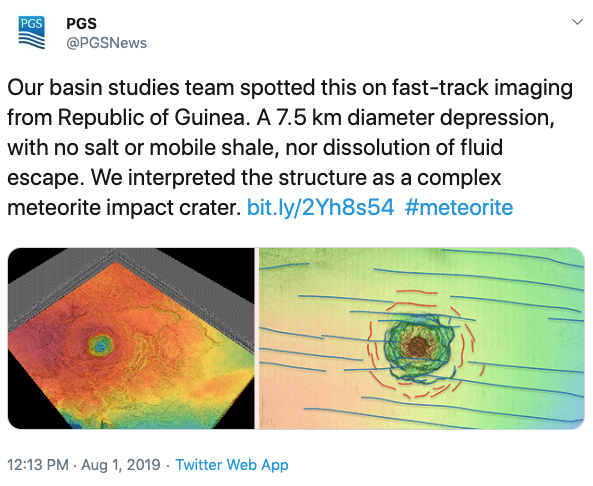

In [1]:
from IPython.display import Image

Image("data/PGS_crater.png")

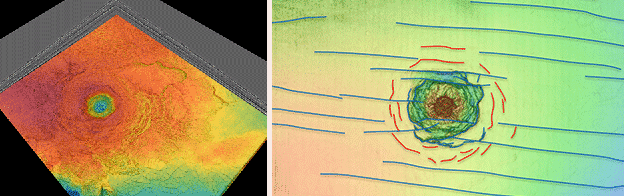

In [2]:
Image("data/PGS_crater_large.png", width=1000)

In [3]:
A = 40 * 60  # Approximate size in km, estimated from image.

In [4]:
t = 541_000_000  # Period of time, pulled out of nowhere.

In [5]:
import numpy as np

d = np.linspace(1, 10)  # km diameter.

In [6]:
def flux(d):
    """
    Compute the number of expected craters of diameter d or greater.
    """
    return 10**(-11.67 - 2.01*np.log(d))

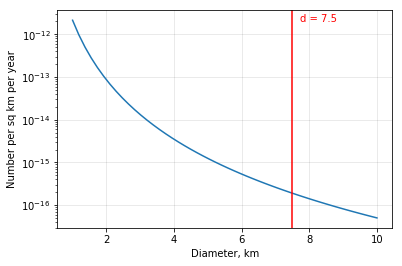

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

n = flux(d)

d_ = 7.5

plt.plot(d, n)

plt.yscale('log')
plt.xlabel("Diameter, km")
plt.ylabel("Number per sq km per year")
plt.axvline(d_, c='r')
plt.text(d_*1.03, 2e-12, f"d = {d_}", color='r')
plt.grid(color='k', alpha=0.1)
plt.show()

### Over a given time

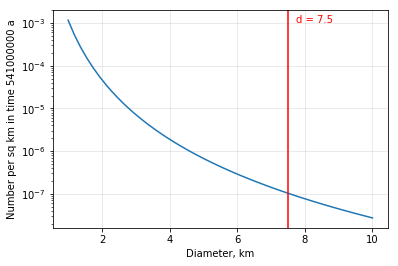

In [8]:
lamda = t * n

plt.plot(d, lamda)

plt.yscale('log')
plt.xlabel("Diameter, km")
plt.ylabel(f"Number per sq km in time {t} a")
plt.axvline(d_, c='r')
plt.text(d_*1.03, 1e-3, f"d = {d_}", color='r')
plt.grid(color='k', alpha=0.1)
plt.show()

### In a given area

In [9]:
def probability(lamda, A=1, r=1):
    return np.exp(-1 * lamda * A) * (lamda * A) / np.math.factorial(r)

P1 = probability(lamda, A, r=1)

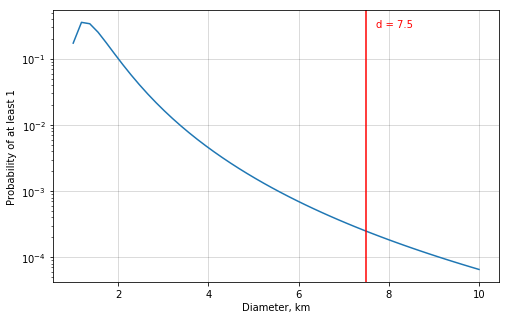

In [16]:
plt.figure(figsize=(8, 5))

plt.plot(d, P1)

plt.yscale('log')
plt.xlabel("Diameter, km")
plt.ylabel(f"Probability of at least 1")
plt.axvline(d_, c='r')
plt.text(d_*1.03, 0.3, f"d = {d_}", color='r')
plt.grid(color='k', alpha=0.175)
plt.show()

Specifically for a diameter of 7.5 km or greater...

In [17]:
d = 7.5
n = flux(d)
lamda = t * n

P = probability(lamda, A, r=1)
P

0.0002473694011963903

In [18]:
print(f"Probability of a crater {d} km or greater: {100*P:.3f}%")

Probability of a crater 7.5 km or greater: 0.025%
